In [1]:
#Setting up: Installing
%pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Setting up: Importing 
import wbdata
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Key '-1835820482140275972' not in persistent cache.
Key '713783588395986258' not in persistent cache.
Key '-2787846888278517049' not in persistent cache.
Key '-6478138144232286875' not in persistent cache.
Key '-5860977947884217266' not in persistent cache.
Key '2152779298823432759' not in persistent cache.
Key '2769939495171502368' not in persistent cache.
Key '-1374180475263539797' not in persistent cache.
Key '6289009009719386637' not in persistent cache.
Key '1922258029684642960' not in persistent cache.
Key '7763005066753031524' not in persistent cache.
Key '-25498800023854399' not in persistent cache.
Key '1396057872530211140' not in persistent cache.
Key '-7932648564114423608' not in persistent cache.
Key '6732898322958829489' not in persistent cache.
Key '548376407043351732' not in persistent cache.
Key '1445103313353216553' not in persistent cache.
Key '4067445921591236001' not in persistent cache.
Key '-2081856460733756003' not in persistent cache.
Key '3115419515452994924' n

In [5]:
#1[A]: Population Statistics

#Getting the population by year, gender, age range and place, which age range is limited to be 5.
def population_5(year,sex,age_range,place):
    if sex == 'F':
        gender = "FE"
    else:
        gender = "MA"

    if age_range[0] < 10:
        data = "SP.POP."+ "0" + str(age_range[0]) + "0" + str(age_range[1]) + "." + gender
    else:
        data = "SP.POP."+ str(age_range[0]) + str(age_range[1]) + "." + gender

    
    variable_labels = {data:"Population"}
    world = wbdata.get_dataframe(variable_labels, country=place, parse_dates=True)
    return world[world.index.year == year]['Population'][0]

#Getting the population by year, gender, age range and place.
#Coded based on population_5 function
def population(year,sex,age_range,place):
    lower_range = age_range[0]
    higher_range = age_range[1]
    population = 0
    
    while (higher_range - lower_range) >= 4:
        population += population_5(year,sex,(lower_range, lower_range+4),place)
        lower_range += 5

    return population
        
'''
Instruction for using the population function:
1. Year is limited to be between 1960 to 2024.
2. Type either 'F' or 'M' for gender.
3. See "wbdata.get_countries()"  for country code
4. About age range: 
    a. Type (lower range, upper range)
    b. lower range has to be: 0, 5, 10, 15.....til 75
    c. upper range has to be: 4, 9, 14, 19.....til 79
    d. Upper range has to be greater than lower range
'''

#Example:
print(population(2021, 'F',(0,79),'KOR'))
print(population(2021, 'F', (15,34), 'KOR'))

24535593.0
5990923.0


/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231

In [6]:
#2[A]: Unit test
#if the assertions are true, which mean the population function work correctly, nothing happened. Otherwise, error message would be raised.

#Unit test 1: 
assert population(2021, 'F', (15,29), 'KOR') == 4423957.0, "Unit test 1 not pass"

#Unit test 2: 
assert population(2012, 'M', (15,19), 'WLD') == 313130205.0, "Unit test 2 not pass"

#Unit test 3: 
assert population(2019, 'F', (35,49), 'HKG') == (population_5(2019, 'F',(35,39),'HKG') + population_5(2019, 'F',(40,44),'HKG') + population_5(2019, 'F',(45,49),'HKG')), "Unit test 3 not pass"

#Unit test 4: 
assert population(1960, 'M', (50,59), 'ZAF') == (population_5(1960, 'M',(50,54),'ZAF') + population_5(1960, 'M',(55,59),'ZAF')), "Unit test 4 not pass"



/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231199530.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return world[world.index.year == year]['Population'][0]
/tmp/ipykernel_854/231

/tmp/ipykernel_854/4286129820.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female.append(df_year["population"][0])
/tmp/ipykernel_854/4286129820.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male.append(df_year["population"][0])
/tmp/ipykernel_854/4286129820.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female.append(df_year["population"][0])
/tmp/ipykernel_854/4286129820.py:21: FutureWarning: Series.__getitem_

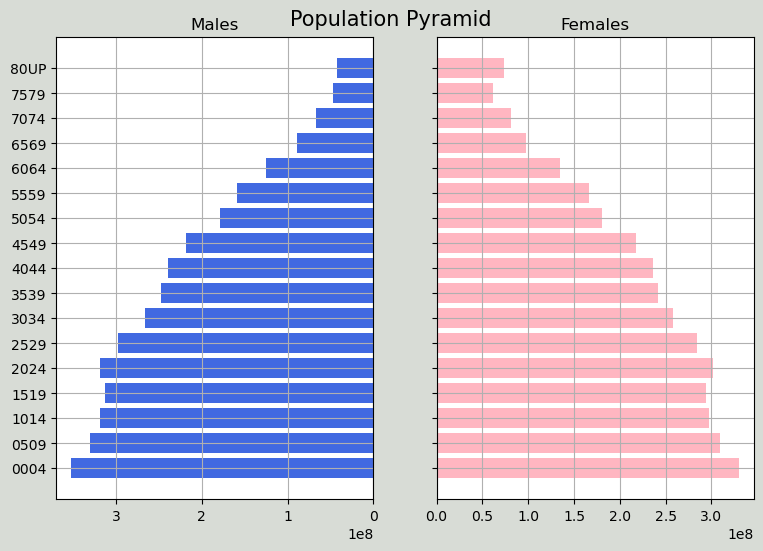

In [8]:
#4[B]: Population Pyramids

def pyramid(year,area_code):

    #Constructing dataframe
    male = []
    female = []

    age_group = ["0004","0509","1014","1519","2024","2529","3034","3539","4044","4549","5054","5559","6064","6569","7074","7579","80UP"]
    gender = ["FE","MA"]
    for i in age_group:
        for j in gender:
            code = "SP.POP."+ i + "." + j
            # print(code)
            data =  {code: "population"}
            df = wbdata.get_dataframe(data, country = area_code, parse_dates=True)
            df_year = df[df.index.year == year]
            if j == "FE":
                female.append(df_year["population"][0])
            else:
                male.append(df_year["population"][0])
            
    df = pd.DataFrame(
        {'Age': age_group,
         'Male': male,
         'Female': female})


    #Constructing the graph
    #Source of code: https://www.statology.org/population-pyramid-python/
    #define x and y limits
    y = range(0, len(df))
    x_male = df['Male']
    x_female = df['Female']
    
    #define plot parameters
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
    
    #specify background color and plot title
    fig.patch.set_facecolor('xkcd:light grey')
    plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
        
    #define male and female bars
    axes[0].barh(y, x_male, align='center', color='royalblue')
    axes[0].set(title='Males')
    axes[1].barh(y, x_female, align='center', color='lightpink')
    axes[1].set(title='Females')
    
    #adjust grid parameters and specify labels for y-axis
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=df['Age'])
    axes[0].invert_xaxis()
    axes[0].grid()
    
    #display plot
    plt.show()    

#Example
pyramid(2012,"WLD")